###  Illustrative notebook showing a single parameter case

In [1]:
run "/Users/octavia/Dropbox/fire/fire_model/startup.py"

Mean analytic G_u 52.18
Mean G_u 52.16


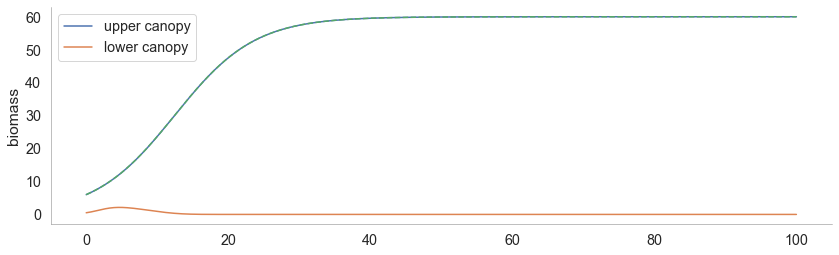

In [2]:
# A simple example 
p = RCSR()
update = {
          "ti" : 0, 
          "tmax" : 100,
          "RI" : 1000,
         }
p = RCSR(update)

p.run()

fig, ax = plt.subplots(1, figsize = (14,4) )

ax.plot(p.t_p, p.G_u_list, '-', label ="upper canopy")        
ax.plot(p.t_p, p.G_l_list, label = "lower canopy")       
ax.set_ylabel("biomass")
ax.legend()

G_ua = p.G_u_analytic(p.t_p)    
ax.plot(p.t_p, G_ua, '--')

G_umean = p.integrate_G_u_analytic( p.G_uo, p.tmax, 0)
print("Mean analytic G_u {0:.2f}".format(G_umean) )
print("Mean G_u {0:.2f}".format(np.mean(p.G_u_list)) )


## Illustrate fires


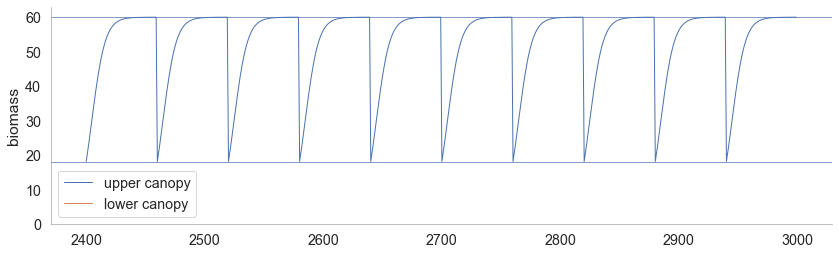

In [3]:
p = RCSR()
update = {        
          "alpha" : 0.05,
          "severity" : 0.7
         }


p = RCSR(update)
p.run()
canopy_plot(p, nfire = 10)

## Plot the analytical solution

 (1) plot the analytical solution after any given fire 
 (2) check the analytical predictions of minimum and maximum G_u
 (3) check the approximation of minimum G_l.  


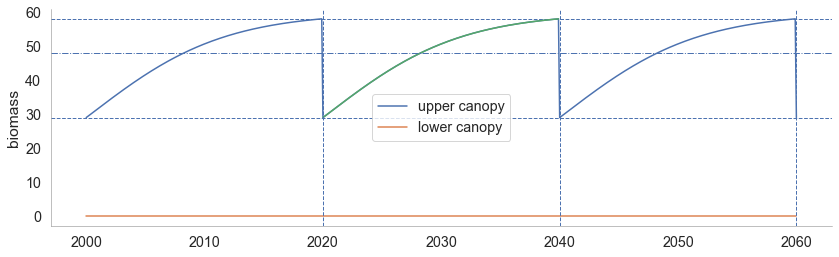

In [4]:

RI = 20

update = {  
          "ti" : 2000, 
          "RI" : RI,
          "tmax" : 3*RI,
         }
                
p = RCSR(update)
p.run()

fig, ax = plt.subplots(1, figsize = (14,4) )


ax.plot(p.t_p, p.G_u_list, '-', label ="upper canopy")        
ax.plot(p.t_p, p.G_l_list, label = "lower canopy")       
plot_G_l_a(p,ax)   
plot_G_u_a(p,ax)   
ax.legend()
ax.set_ylabel("biomass")    
plot_fire_events(p, ax)
